In [9]:
import pandas as pd
import math
import numpy as np

In [61]:
data = pd.read_csv('city-gps.txt', sep = ' ', index_col = None, names=["City", "latitude", "Longitude"])
lat_long = data.set_index('City').T.to_dict('list')

In [69]:
lat_long = data.set_index('City').T.to_dict('list')

In [3]:
raw_gps_data = open("city-gps.txt", "r").readlines()
raw_gps_data = [line.split() for line in raw_gps_data]
raw_gps_data = [(line_split[0], (math.radians(float(line_split[1])), math.radians(float(line_split[2])))) for line_split in raw_gps_data]

In [4]:
raw_gps_data

[('"Y"_City,_Arkansas', (0.6062419308226524, -1.6418880727248033)),
 ('Abbot_Village,_Maine', (0.7888484070572778, -1.2122850860967953)),
 ('Abbotsford,_Wisconsin', (0.7844618989735085, -1.5763110261791304)),
 ('Abbott,_New_Mexico', (0.6336519968579948, -1.8196605576540696)),
 ('Abbyville,_Kansas', (0.6627162946850236, -1.7139871511404619)),
 ('Aberdeen,_Mississippi', (0.5903596074170999, -1.5453783167359274)),
 ('Aberdeen,_North_Carolina', (0.6131611664691363, -1.386305929948364)),
 ('Aberdeen,_Ohio', (0.6746680109513786, -1.4619057985043187)),
 ('Aberdeen,_South_Dakota', (0.7935086822515272, -1.7189133953140932)),
 ('Aberdeen,_Washington', (0.8198748878052027, -2.1609920111433203)),
 ('Abilene,_Texas', (0.5663372882917318, -1.7406717344202984)),
 ('Abingdon,_Virginia', (0.6407074624339139, -1.4307746381438469)),
 ('Abiquiu,_New_Mexico', (0.6319355685130843, -1.8556103190065565)),
 ('Aboite,_Indiana', (0.7155995319103442, -1.489080988600903)),
 ('Abrams,_Wisconsin', (0.781550778792973

In [6]:
math.radians(-94.073257)

-1.6418880727248033

In [70]:
lat_long

{'Y_City,_Arkansas': [34.735104, -94.073257],
 'Abbot_Village,_Maine': [45.1976844, -69.458819],
 'Abbotsford,_Wisconsin': [44.946356, -90.315969],
 'Abbott,_New_Mexico': [36.3055851, -104.2588701],
 'Abbyville,_Kansas': [37.9708467, -98.2042299],
 'Aberdeen,_Mississippi': [33.8251139, -88.5436553],
 'Aberdeen,_North_Carolina': [35.131547, -79.4294789],
 'Aberdeen,_Ohio': [38.6556296, -83.7610323],
 'Aberdeen,_South_Dakota': [45.4646985, -98.4864829],
 'Aberdeen,_Washington': [46.9753708, -123.8157218],
 'Abilene,_Texas': [32.4487364, -99.7331439],
 'Abingdon,_Virginia': [36.7098335, -81.9773482],
 'Abiquiu,_New_Mexico': [36.207241, -106.3186397],
 'Aboite,_Indiana': [41.000833, -85.318056],
 'Abrams,_Wisconsin': [44.7795611, -88.0598546],
 'Ackerman,_Mississippi': [33.3101243, -89.1728434],
 'Acme,_Michigan': [44.7719461, -85.5014607],
 'Acme,_Wyoming': [44.9105275, -106.9850706],
 'Acorn,_Arkansas': [34.6428825, -94.2010437],
 'Ada,_Minnesota': [47.299689, -96.5153463],
 'Ada,_Oklaho

In [11]:
import matplotlib.pyplot as plt

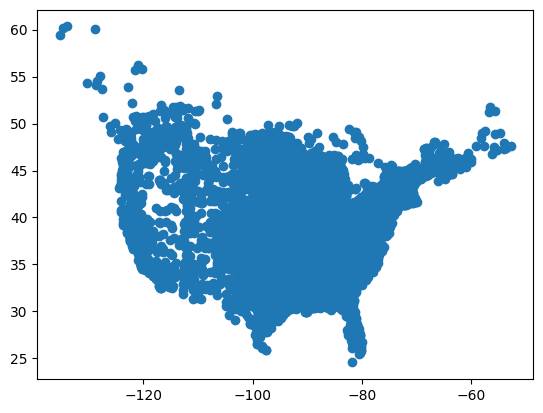

In [14]:
plt.scatter(data['Long'], data['Lat'])

In [16]:
data1 = pd.read_csv('road-segments.txt', sep = ' ', index_col = None, names = [ 'first_city', 'second_city', 'length', 'speed_limit', 'name_of_highway'])
data2 = data1.copy()
data2.rename(columns={"first_city": "second_city", "second_city": "first_city"},inplace = True )
data_final = data1.append(data2)
data_final.drop_duplicates(inplace=True)

C:\Users\sarad\AppData\Local\Temp\ipykernel_10504\2402998846.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_final = data1.append(data2)


In [24]:
data_final['Junction'] = np.where(data_final["first_city"].str.contains("&"), 1,0)
# data_final['Junction'] = np.where('&' in data_final['second_city'], 1,data_final['Junction'])

In [28]:
data_final[data_final['Junction'] == 1].to_csv('junction.csv')

In [26]:
data_final[data_final['Junction'] == 0]

,first_city,second_city,length,speed_limit,name_of_highway,Junction
0,"Y_City,_Arkansas","Acorn,_Arkansas",15,45,US_71/270,0
1,"Y_City,_Arkansas","Greenwood,_Arkansas",46,45,US_71,0
2,"Y_City,_Arkansas","Hot_Springs,_Arkansas",70,45,US_270,0
3,"Abbot_Village,_Maine","Bingham,_Maine",24,45,ME_16,0
4,"Abbot_Village,_Maine","Guilford,_Maine",4,45,ME_6/15/16,0
...,...,...,...,...,...,...
12033,"Winnebago,_Wisconsin","Winchester,_Wisconsin",12,45,WI_110,0
12034,"Worthington,_Minnesota","Windom,_Minnesota",31,45,MN_60,0
12035,"Winton,_North_Carolina","Windsor,_North_Carolina",27,52,US_13,0
12036,"Yuba_City,_California","Woodland,_California",36,45,CA_99_&_113,0


In [24]:
data2 = data1.copy()

In [26]:
data2.rename(columns={"first_city": "second_city", "second_city": "first_city"},inplace = True )

In [35]:
data2

,second_city,first_city,length,speed_limit,name_of_highway
0,"Y_City,_Arkansas","Acorn,_Arkansas",15,45,US_71/270
1,"Y_City,_Arkansas","Greenwood,_Arkansas",46,45,US_71
2,"Y_City,_Arkansas","Hot_Springs,_Arkansas",70,45,US_270
3,"Abbot_Village,_Maine","Bingham,_Maine",24,45,ME_16
4,"Abbot_Village,_Maine","Guilford,_Maine",4,45,ME_6/15/16
...,...,...,...,...,...
12033,"Winchester,_Wisconsin","Winnebago,_Wisconsin",12,45,WI_110
12034,"Windom,_Minnesota","Worthington,_Minnesota",31,45,MN_60
12035,"Windsor,_North_Carolina","Winton,_North_Carolina",27,52,US_13
12036,"Woodland,_California","Yuba_City,_California",36,45,CA_99_&_113


In [30]:
data1.tail()

,first_city,second_city,length,speed_limit,name_of_highway
12033,"Winchester,_Wisconsin","Winnebago,_Wisconsin",12,45,WI_110
12034,"Windom,_Minnesota","Worthington,_Minnesota",31,45,MN_60
12035,"Windsor,_North_Carolina","Winton,_North_Carolina",27,52,US_13
12036,"Woodland,_California","Yuba_City,_California",36,45,CA_99_&_113
12037,"Woodworth,_Ohio","Youngstown,_Ohio",10,40,OH_7


In [49]:
 data_final = data1.append(data2)

C:\Users\sarad\AppData\Local\Temp\ipykernel_22408\2828559728.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_final = data1.append(data2)


In [38]:
data_final[data_final['first_city'] == 'Y_City,_Arkansas']

,first_city,second_city,length,speed_limit,name_of_highway
0,"Y_City,_Arkansas","Acorn,_Arkansas",15,45,US_71/270
1,"Y_City,_Arkansas","Greenwood,_Arkansas",46,45,US_71
2,"Y_City,_Arkansas","Hot_Springs,_Arkansas",70,45,US_270


In [39]:
data_final[data_final['second_city'] == 'Y_City,_Arkansas']

,first_city,second_city,length,speed_limit,name_of_highway
0,"Acorn,_Arkansas","Y_City,_Arkansas",15,45,US_71/270
1,"Greenwood,_Arkansas","Y_City,_Arkansas",46,45,US_71
2,"Hot_Springs,_Arkansas","Y_City,_Arkansas",70,45,US_270


In [40]:
data_final[data_final.duplicated(keep=False)]

,first_city,second_city,length,speed_limit,name_of_highway
6250,"Goldsboro,_North_Carolina","Goldsboro,_North_Carolina",20,52,US_70
9847,"Loxley,_Alabama","Stapleton,_Alabama",4,52,AL_59
9848,"Loxley,_Alabama","Stapleton,_Alabama",4,52,AL_59
10821,"North_Troy,_Vermont","Troy,_Vermont",6,45,VT_101
10822,"North_Troy,_Vermont","Troy,_Vermont",6,45,VT_101
6250,"Goldsboro,_North_Carolina","Goldsboro,_North_Carolina",20,52,US_70
9847,"Stapleton,_Alabama","Loxley,_Alabama",4,52,AL_59
9848,"Stapleton,_Alabama","Loxley,_Alabama",4,52,AL_59
10821,"Troy,_Vermont","North_Troy,_Vermont",6,45,VT_101
10822,"Troy,_Vermont","North_Troy,_Vermont",6,45,VT_101


In [51]:
data_final.drop_duplicates(inplace=True)

In [64]:
len(data)

5478

In [65]:
data.drop_duplicates(inplace=True)

In [66]:
len(data)

5477

In [50]:
len(data_final)

24076

In [52]:
len(data_final)

24071

In [6]:
data_final[data_final['first_city'] == 'Aberdeen,_Mississippi']

,first_city,second_city,length,speed_limit,name_of_highway
17,"Aberdeen,_Mississippi","Amory,_Mississippi",12,45,MS_25
18,"Aberdeen,_Mississippi","Columbus,_Mississippi",26,52,US_45
19,"Aberdeen,_Mississippi","Greenwood_Springs,_Mississippi",11,45,MS_8
20,"Aberdeen,_Mississippi","Jct_Alt_US_45_&_MS_8,_Mississippi",15,45,MS_8
21,"Aberdeen,_Mississippi","New_Wren,_Mississippi",18,45,US_45


In [56]:
data_list

[['Y_City,_Arkansas', 'Acorn,_Arkansas', 15, 45, 'US_71/270'],
 ['Y_City,_Arkansas', 'Greenwood,_Arkansas', 46, 45, 'US_71'],
 ['Y_City,_Arkansas', 'Hot_Springs,_Arkansas', 70, 45, 'US_270'],
 ['Abbot_Village,_Maine', 'Bingham,_Maine', 24, 45, 'ME_16'],
 ['Abbot_Village,_Maine', 'Guilford,_Maine', 4, 45, 'ME_6/15/16'],
 ['Abbot_Village,_Maine', 'Jackman_Station,_Maine', 73, 45, 'ME_6/15'],
 ['Abbotsford,_Wisconsin', 'Jct_WI_29_&_WI_97,_Wisconsin', 12, 45, 'WI_29'],
 ['Abbotsford,_Wisconsin', 'Marshfield,_Wisconsin', 22, 45, 'WI_13'],
 ['Abbotsford,_Wisconsin', 'Medford,_Wisconsin', 14, 45, 'WI_13'],
 ['Abbotsford,_Wisconsin', 'Withee,_Wisconsin', 14, 45, 'WI_29'],
 ['Abbott,_New_Mexico', 'Clayton,_New_Mexico', 63, 45, 'US_56'],
 ['Abbott,_New_Mexico', 'Roy,_New_Mexico', 26, 45, 'NM_39'],
 ['Abbott,_New_Mexico', 'Springer,_New_Mexico', 20, 45, 'US_56'],
 ['Abbyville,_Kansas', 'Arlington,_Kansas', 5, 45, 'KS_14'],
 ['Abbyville,_Kansas', 'Jct_KS_14_&_KS_96_S,_Kansas', 12, 45, 'KS_14'],
 [

In [55]:
data_list = data_final.values.tolist()

In [59]:
def sucessor(data_list,city):
    succ = []
    for i in data_list:
        if i[0] == city:
            succ.append(i[1])
    return succ

In [60]:
sucessor(data_list,'Abbyville,_Kansas')

['Arlington,_Kansas',
 'Jct_KS_14_&_KS_96_S,_Kansas',
 'Partridge,_Kansas',
 'St._John,_Kansas']

In [63]:
lat_long

[['Y_City,_Arkansas', 34.735104, -94.073257],
 ['Abbot_Village,_Maine', 45.1976844, -69.458819],
 ['Abbotsford,_Wisconsin', 44.946356, -90.315969],
 ['Abbott,_New_Mexico', 36.3055851, -104.2588701],
 ['Abbyville,_Kansas', 37.9708467, -98.2042299],
 ['Aberdeen,_Mississippi', 33.8251139, -88.5436553],
 ['Aberdeen,_North_Carolina', 35.131547, -79.4294789],
 ['Aberdeen,_Ohio', 38.6556296, -83.7610323],
 ['Aberdeen,_South_Dakota', 45.4646985, -98.4864829],
 ['Aberdeen,_Washington', 46.9753708, -123.8157218],
 ['Abilene,_Texas', 32.4487364, -99.7331439],
 ['Abingdon,_Virginia', 36.7098335, -81.9773482],
 ['Abiquiu,_New_Mexico', 36.207241, -106.3186397],
 ['Aboite,_Indiana', 41.000833, -85.318056],
 ['Abrams,_Wisconsin', 44.7795611, -88.0598546],
 ['Ackerman,_Mississippi', 33.3101243, -89.1728434],
 ['Acme,_Michigan', 44.7719461, -85.5014607],
 ['Acme,_Wyoming', 44.9105275, -106.9850706],
 ['Acorn,_Arkansas', 34.6428825, -94.2010437],
 ['Ada,_Minnesota', 47.299689, -96.5153463],
 ['Ada,_Oklah

In [81]:
def Eculid_dist(city1,city2,data):
    x,y = data[city1]
    x1,y1 = data[city2]
    
    ecl = ((x-x1)**2 + (y-y1)**2)**0.5
    return ecl
    
    

In [82]:
Eculid_dist('Atlanta,_Texas','Ashtabula,_Ohio',lat_long)

15.983238144294777

In [83]:
def h(city1,city2,data):
    x,y = data[city1]
    x1,y1 = data[city2]
    
    ecl = ((x-x1)**2 + (y-y1)**2)**0.5
    return ecl

In [ ]:
# def h(s, city2):
    
    

In [91]:
def successors(data_list,city):
    succ = []
    for i in data_list:
        if i[0] == city:
            succ.append(i[1])
    return succ

In [92]:

import sys
from queue import PriorityQueue

def is_goal(state,city2):
    return state == city2

def solve(city1,city2, data_list,lat_long):
    fringe = PriorityQueue()
    count = 0
    fringe.put((count,(city1,[])))
    while ( not fringe.empty()):
        
        gg = (fringe.get())
        (state, path) = gg[1]
        
        
        if is_goal(state,city2):
            return path+[state,]
        
        count+=1
        for s in successors(data_list,state):
            fringe.put((len(path)+h(s,city2,lat_long),(s, path+[state])))
            

    return []
               


In [104]:
solve('Aberdeen,_Ohio','Cincinnati,_Ohio',data_list,lat_long)

['Aberdeen,_Ohio', 'Fruit_Hill,_Ohio', 'Cincinnati,_Ohio']

In [94]:
successors(data_list,'Aberdeen,_Mississippi')

['Amory,_Mississippi',
 'Columbus,_Mississippi',
 'Greenwood_Springs,_Mississippi',
 'Jct_Alt_US_45_&_MS_8,_Mississippi',
 'New_Wren,_Mississippi']

In [95]:
data_list[data_list['city1']]

TypeError: list indices must be integers or slices, not str

In [97]:
data_final[data_final['first_city'] == 'Aberdeen,_Ohio']

,first_city,second_city,length,speed_limit,name_of_highway
26,"Aberdeen,_Ohio","Falmouth,_Kentucky",40,45,KY_22_&_KY_10
27,"Aberdeen,_Ohio","Fincastle,_Ohio",29,45,US_62
28,"Aberdeen,_Ohio","Flemingsburg,_Kentucky",17,45,KY_11
29,"Aberdeen,_Ohio","Fruit_Hill,_Ohio",51,45,US_52
30,"Aberdeen,_Ohio","Highland_Heights,_Kentucky",54,52,KY_546
31,"Aberdeen,_Ohio","Paris,_Kentucky",38,45,US_68
32,"Aberdeen,_Ohio","Peebles,_Ohio",31,45,OH_41
33,"Aberdeen,_Ohio","Portsmouth,_Ohio",54,45,US_52


In [103]:
data_final[data_final['first_city'] == 'Fruit_Hill,_Ohio']

,first_city,second_city,length,speed_limit,name_of_highway
5980,"Fruit_Hill,_Ohio","Highland_Heights,_Kentucky",4,55,I-275
5981,"Fruit_Hill,_Ohio","Summerside,_Ohio",8,55,I-275
29,"Fruit_Hill,_Ohio","Aberdeen,_Ohio",51,45,US_52
3400,"Fruit_Hill,_Ohio","Cincinnati,_Ohio",12,30,US_52


In [10]:
def calculate_distance_haversine(lat_long1, lat_long2):
    lat_dif_rad = math.radians(lat_long1[0]) - math.radians(lat_long2[0])
    long_dif_rad = math.radians(lat_long1[1]) - math.radians(lat_long2[1])
    val = (math.sin(lat_dif_rad / 2) ** 2) + math.cos(lat_long1[0]) * math.cos(lat_long2[0]) * (math.sin(long_dif_rad / 2) ** 2)
    return 2 * math.atan2(math.sqrt(val), math.sqrt(1 - val)) *3958.8
           

In [28]:
calculate_distance_haversine([34.735104, -94.073257],[45.1976844, -69.458819])

ValueError: math domain error

In [38]:
def distance(lat1, lat2, lon1, lon2):
     
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    print(dlat,dlon)
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 3956
      
    # calculate the result
    return(c * r)

In [40]:
def calculate_distance_haversine1(lat_long1, lat_long2):
    print(lat_long1[0],lat_long1[1])
    lat_dif_rad = math.radians(lat_long1[0]) - math.radians(lat_long2[0])
    long_dif_rad = math.radians(lat_long1[1]) - math.radians(lat_long2[1])
    print(lat_dif_rad,long_dif_rad)
    a = sin(lat_dif_rad / 2)**2 + cos(lat_long1[0]) * cos(lat_long2[0]) * sin(long_dif_rad / 2)**2
    c = 2 * asin(sqrt(a)) *3956
    return c

In [46]:
calculate_distance_haversine1([45.1976844, -69.458819],[34.735104, -94.073257])

45.1976844 -69.458819
0.18260647623462534 0.429602986628008


ValueError: math domain error

In [50]:
distance1(34.735104, 45.1976844,-94.073257,  -69.458819)

0.18260647623462534 0.429602986628008


1480.8515272080626

In [ ]:
[('"Y"_City,_Arkansas', (0.6062419308226524, -1.6418880727248033)),
 ('Abbot_Village,_Maine', (0.7888484070572778, -1.2122850860967953)),

In [ ]:
'Y_City,_Arkansas': [34.735104, -94.073257],
 'Abbot_Village,_Maine': [45.1976844, -69.458819]

In [26]:
radians(34.735104)
# /57.29577951

0.6062419308226524

In [49]:
from math import radians, cos, sin, asin, sqrt
def distance1(lat1, lat2, lon1, lon2):
    def dis (list1, list2)
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    print(dlat,dlon)
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 3956
      
    # calculate the result
    return(c * r)
# calculate_distance_haversine1
'Y_City,_Arkansas': [34.735104, -94.073257],
 'Abbot_Village,_Maine': [45.1976844, -69.458819]
    
    def calculate_distance_haversine1(lat_long1, lat_long2):
    print(lat_long1[0],lat_long1[1])
    lat_dif_rad = math.radians(lat_long1[0]) - math.radians(lat_long2[0])
    long_dif_rad = math.radians(lat_long1[1]) - math.radians(lat_long2[1])
    print(lat_dif_rad,long_dif_rad)
    a = sin(lat_dif_rad / 2)**2 + cos(lat_long1[0]) * cos(lat_long2[0]) * sin(long_dif_rad / 2)**2
    c = 2 * asin(sqrt(a)) *3956
    return c

In [10]:
'&' in 'Jct_Alt_US_45_&_MS_8'

True